In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time
from joblib import dump

In [3]:
import pandas as pd
df = pd.read_csv('combined.csv')
df.shape

C:\Users\Rajasekar\AppData\Local\Temp\ipykernel_22488\2249457417.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('combined.csv')


(1280895, 11)

In [4]:
print(df.columns)

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease'],
      dtype='object')


In [5]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1280890,2012-02,YISHUN,5 ROOM,212,YISHUN ST 21,10 TO 12,121.0,Improved,1985,476888.0,NaN
1280891,2012-02,YISHUN,5 ROOM,758,YISHUN ST 72,01 TO 03,122.0,Improved,1986,490000.0,NaN
1280892,2012-02,YISHUN,5 ROOM,873,YISHUN ST 81,01 TO 03,122.0,Improved,1988,488000.0,NaN
1280893,2012-02,YISHUN,EXECUTIVE,664,YISHUN AVE 4,07 TO 09,181.0,Apartment,1992,705000.0,NaN


In [6]:
df.drop(columns=['remaining_lease'], inplace=True)

In [7]:
df.isna().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
dtype: int64

C:\Users\Rajasekar\AppData\Local\Temp\ipykernel_22488\1564939034.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.resale_price)
C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

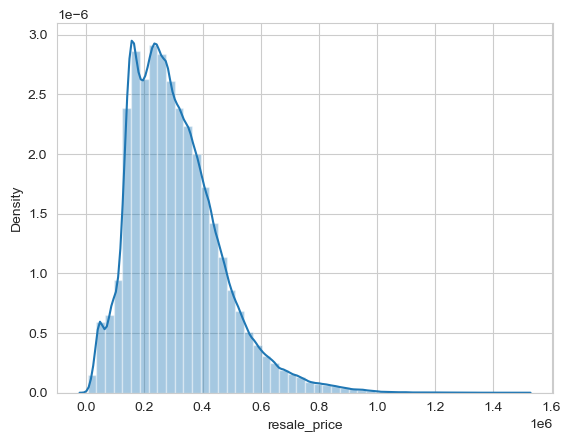

In [8]:
sns.set_style('whitegrid')
sns.distplot(df.resale_price)
plt.show()

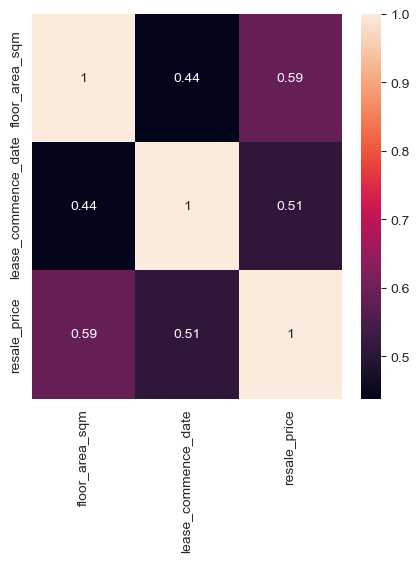

In [9]:
# Assuming df is your DataFrame
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_df = df[numeric_columns]

plt.figure(figsize=(5, 5))
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

In [10]:
# check for any typos in values
print("Total of {0} towns with values {1}\n".format(df.town.nunique(), df.town.unique()))
print("Total of {0} types of flats with values {1}\n".format(df.flat_type.nunique(),df.flat_type.unique()))
print("Total of {0} models of flats with values {1}\n".format(df.flat_model.nunique(),df.flat_model.unique()))
print(df.storey_range.unique())

Total of 27 towns with values ['ANG MO KIO' 'BEDOK' 'BISHAN' 'BUKIT BATOK' 'BUKIT MERAH' 'BUKIT TIMAH'
 'CENTRAL AREA' 'CHOA CHU KANG' 'CLEMENTI' 'GEYLANG' 'HOUGANG'
 'JURONG EAST' 'JURONG WEST' 'KALLANG/WHAMPOA' 'MARINE PARADE'
 'QUEENSTOWN' 'SENGKANG' 'SERANGOON' 'TAMPINES' 'TOA PAYOH' 'WOODLANDS'
 'YISHUN' 'LIM CHU KANG' 'SEMBAWANG' 'BUKIT PANJANG' 'PASIR RIS' 'PUNGGOL']

Total of 8 types of flats with values ['1 ROOM' '3 ROOM' '4 ROOM' '5 ROOM' '2 ROOM' 'EXECUTIVE'
 'MULTI GENERATION' 'MULTI-GENERATION']

Total of 34 models of flats with values ['IMPROVED' 'NEW GENERATION' 'MODEL A' 'STANDARD' 'SIMPLIFIED'
 'MODEL A-MAISONETTE' 'APARTMENT' 'MAISONETTE' 'TERRACE' '2-ROOM'
 'IMPROVED-MAISONETTE' 'MULTI GENERATION' 'PREMIUM APARTMENT' 'Improved'
 'New Generation' 'Model A' 'Standard' 'Simplified' 'Premium Apartment'
 'Maisonette' 'Apartment' 'Model A2' 'Type S1' 'Type S2' 'Adjoined flat'
 'Terrace' 'DBSS' 'Model A-Maisonette' 'Premium Maisonette'
 'Multi Generation' 'Premium Apartment

In [11]:
# town, flat type, flat model, storey range: one-hot encoding (previously label)
# month: label encoding. 2017-02 is encoded as 0

In [12]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
ohe = preprocessing.OneHotEncoder()

town_ohe = pd.get_dummies(df['town'], prefix='Town')

df_train = pd.concat([df, town_ohe], axis=1 )
df_train

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,...,Town_PASIR RIS,Town_PUNGGOL,Town_QUEENSTOWN,Town_SEMBAWANG,Town_SENGKANG,Town_SERANGOON,Town_TAMPINES,Town_TOA PAYOH,Town_WOODLANDS,Town_YISHUN
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,...,False,False,False,False,False,False,False,False,False,False
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,...,False,False,False,False,False,False,False,False,False,False
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,...,False,False,False,False,False,False,False,False,False,False
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,...,False,False,False,False,False,False,False,False,False,False
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1280890,2012-02,YISHUN,5 ROOM,212,YISHUN ST 21,10 TO 12,121.0,Improved,1985,476888.0,...,False,False,False,False,False,False,False,False,False,True
1280891,2012-02,YISHUN,5 ROOM,758,YISHUN ST 72,01 TO 03,122.0,Improved,1986,490000.0,...,False,False,False,False,False,False,False,False,False,True
1280892,2012-02,YISHUN,5 ROOM,873,YISHUN ST 81,01 TO 03,122.0,Improved,1988,488000.0,...,False,False,False,False,False,False,False,False,False,True
1280893,2012-02,YISHUN,EXECUTIVE,664,YISHUN AVE 4,07 TO 09,181.0,Apartment,1992,705000.0,...,False,False,False,False,False,False,False,False,False,True


In [13]:
flat_model_ohe = pd.get_dummies(df['flat_model'], prefix='Model')

df_train = pd.concat([df_train, flat_model_ohe], axis=1 )
df_train

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,...,Model_Premium Apartment Loft,Model_Premium Maisonette,Model_SIMPLIFIED,Model_STANDARD,Model_Simplified,Model_Standard,Model_TERRACE,Model_Terrace,Model_Type S1,Model_Type S2
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,...,False,False,False,False,False,False,False,False,False,False
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,...,False,False,False,False,False,False,False,False,False,False
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,...,False,False,False,False,False,False,False,False,False,False
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,...,False,False,False,False,False,False,False,False,False,False
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1280890,2012-02,YISHUN,5 ROOM,212,YISHUN ST 21,10 TO 12,121.0,Improved,1985,476888.0,...,False,False,False,False,False,False,False,False,False,False
1280891,2012-02,YISHUN,5 ROOM,758,YISHUN ST 72,01 TO 03,122.0,Improved,1986,490000.0,...,False,False,False,False,False,False,False,False,False,False
1280892,2012-02,YISHUN,5 ROOM,873,YISHUN ST 81,01 TO 03,122.0,Improved,1988,488000.0,...,False,False,False,False,False,False,False,False,False,False
1280893,2012-02,YISHUN,EXECUTIVE,664,YISHUN AVE 4,07 TO 09,181.0,Apartment,1992,705000.0,...,False,False,False,False,False,False,False,False,False,False


In [14]:
flat_type_ohe = pd.get_dummies(df['flat_type'], prefix='Type')

df_train = pd.concat([df_train, flat_type_ohe], axis=1 )
df_train

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,...,Model_Type S1,Model_Type S2,Type_1 ROOM,Type_2 ROOM,Type_3 ROOM,Type_4 ROOM,Type_5 ROOM,Type_EXECUTIVE,Type_MULTI GENERATION,Type_MULTI-GENERATION
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,...,False,False,True,False,False,False,False,False,False,False
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,...,False,False,True,False,False,False,False,False,False,False
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,...,False,False,True,False,False,False,False,False,False,False
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,...,False,False,True,False,False,False,False,False,False,False
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1280890,2012-02,YISHUN,5 ROOM,212,YISHUN ST 21,10 TO 12,121.0,Improved,1985,476888.0,...,False,False,False,False,False,False,True,False,False,False
1280891,2012-02,YISHUN,5 ROOM,758,YISHUN ST 72,01 TO 03,122.0,Improved,1986,490000.0,...,False,False,False,False,False,False,True,False,False,False
1280892,2012-02,YISHUN,5 ROOM,873,YISHUN ST 81,01 TO 03,122.0,Improved,1988,488000.0,...,False,False,False,False,False,False,True,False,False,False
1280893,2012-02,YISHUN,EXECUTIVE,664,YISHUN AVE 4,07 TO 09,181.0,Apartment,1992,705000.0,...,False,False,False,False,False,False,False,True,False,False


In [15]:
storey_range_ohe = pd.get_dummies(df['storey_range'], prefix='Storey')

df_train = pd.concat([df_train, storey_range_ohe], axis=1 )
df_train

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,...,Storey_28 TO 30,Storey_31 TO 33,Storey_31 TO 35,Storey_34 TO 36,Storey_36 TO 40,Storey_37 TO 39,Storey_40 TO 42,Storey_43 TO 45,Storey_46 TO 48,Storey_49 TO 51
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,...,False,False,False,False,False,False,False,False,False,False
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,...,False,False,False,False,False,False,False,False,False,False
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,...,False,False,False,False,False,False,False,False,False,False
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,...,False,False,False,False,False,False,False,False,False,False
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1280890,2012-02,YISHUN,5 ROOM,212,YISHUN ST 21,10 TO 12,121.0,Improved,1985,476888.0,...,False,False,False,False,False,False,False,False,False,False
1280891,2012-02,YISHUN,5 ROOM,758,YISHUN ST 72,01 TO 03,122.0,Improved,1986,490000.0,...,False,False,False,False,False,False,False,False,False,False
1280892,2012-02,YISHUN,5 ROOM,873,YISHUN ST 81,01 TO 03,122.0,Improved,1988,488000.0,...,False,False,False,False,False,False,False,False,False,False
1280893,2012-02,YISHUN,EXECUTIVE,664,YISHUN AVE 4,07 TO 09,181.0,Apartment,1992,705000.0,...,False,False,False,False,False,False,False,False,False,False


In [16]:
le = preprocessing.LabelEncoder()
df_train['month_encoded'] = le.fit_transform(df['month'])
dump(le, filename="month_encoder.pkl")

mapping = dict(zip(le.classes_, range(0, len(le.classes_))))
print(mapping)

{'1990-01': 0, '1990-02': 1, '1990-03': 2, '1990-04': 3, '1990-05': 4, '1990-06': 5, '1990-07': 6, '1990-08': 7, '1990-09': 8, '1990-10': 9, '1990-11': 10, '1990-12': 11, '1991-01': 12, '1991-02': 13, '1991-03': 14, '1991-04': 15, '1991-05': 16, '1991-06': 17, '1991-07': 18, '1991-08': 19, '1991-09': 20, '1991-10': 21, '1991-11': 22, '1991-12': 23, '1992-01': 24, '1992-02': 25, '1992-03': 26, '1992-04': 27, '1992-05': 28, '1992-06': 29, '1992-07': 30, '1992-08': 31, '1992-09': 32, '1992-10': 33, '1992-11': 34, '1992-12': 35, '1993-01': 36, '1993-02': 37, '1993-03': 38, '1993-04': 39, '1993-05': 40, '1993-06': 41, '1993-07': 42, '1993-08': 43, '1993-09': 44, '1993-10': 45, '1993-11': 46, '1993-12': 47, '1994-01': 48, '1994-02': 49, '1994-03': 50, '1994-04': 51, '1994-05': 52, '1994-06': 53, '1994-07': 54, '1994-08': 55, '1994-09': 56, '1994-10': 57, '1994-11': 58, '1994-12': 59, '1995-01': 60, '1995-02': 61, '1995-03': 62, '1995-04': 63, '1995-05': 64, '1995-06': 65, '1995-07': 66, '199

In [17]:
df_train.drop(['street_name', 'block'], axis=1, inplace=True)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [19]:
# drop streetname, block -- not using these features
#df.drop(['street_name', 'block'], axis=1, inplace=True)

In [20]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0
...,...,...,...,...,...,...,...,...,...,...
1280890,2012-02,YISHUN,5 ROOM,212,YISHUN ST 21,10 TO 12,121.0,Improved,1985,476888.0
1280891,2012-02,YISHUN,5 ROOM,758,YISHUN ST 72,01 TO 03,122.0,Improved,1986,490000.0
1280892,2012-02,YISHUN,5 ROOM,873,YISHUN ST 81,01 TO 03,122.0,Improved,1988,488000.0
1280893,2012-02,YISHUN,EXECUTIVE,664,YISHUN AVE 4,07 TO 09,181.0,Apartment,1992,705000.0


In [21]:
y = df.resale_price
X = df_train.drop(['flat_type', 'storey_range', 'flat_model', 'month', 'town', 'resale_price'], axis=1)

In [22]:
X

,floor_area_sqm,lease_commence_date,Town_ANG MO KIO,Town_BEDOK,Town_BISHAN,Town_BUKIT BATOK,Town_BUKIT MERAH,Town_BUKIT PANJANG,Town_BUKIT TIMAH,Town_CENTRAL AREA,...,Storey_31 TO 33,Storey_31 TO 35,Storey_34 TO 36,Storey_36 TO 40,Storey_37 TO 39,Storey_40 TO 42,Storey_43 TO 45,Storey_46 TO 48,Storey_49 TO 51,month_encoded
0,31.0,1977,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
1,31.0,1977,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
2,31.0,1977,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
3,31.0,1977,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
4,73.0,1976,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1280890,121.0,1985,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,265
1280891,122.0,1986,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,265
1280892,122.0,1988,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,265
1280893,181.0,1992,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,265


In [23]:
y

0            9000.0
1            6000.0
2            8000.0
3            6000.0
4           47200.0
             ...   
1280890    476888.0
1280891    490000.0
1280892    488000.0
1280893    705000.0
1280894    630000.0
Name: resale_price, Length: 1280895, dtype: float64

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
poly_reg = LinearRegression()
poly_reg.fit(X_train, y_train)

LinearRegression()

In [26]:
poly_preds = poly_reg.predict(X_test)
rmse = mean_squared_error(y_test, poly_preds) ** 0.5
acc = r2_score(y_test, poly_preds)
print("RMSE: ", rmse)
print("R2: ", acc)

RMSE:  59894.83425552259
R2:  0.8479200083651378


In [27]:
y_pred = poly_reg.predict(X_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Absolute Error: 45329.77190937264
Mean Squared Error: 3587391170.4965224
R-squared (R2) Score: 0.8479200083651378


In [28]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()

# Fit the model to the training data
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Absolute Error: 12825.951713048824
Mean Squared Error: 584437548.4657784
R-squared (R2) Score: 0.9752239849914462


In [29]:
import pickle
pickle.dump(regressor, open('regressormodel.pkl','wb'))